# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `jax` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions. .

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (10 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`

In [359]:
import numpy as np
import pandas as pd
n=50
p=.5
ret=np.math.comb(n,25)*(p**25)*(1-p)**(n-25)
print("the prob. that 25 employees aprove is:",ret)

the prob. that 25 employees aprove is: 0.11227517265921705


In [360]:
samplemean=n*p
dev=np.sqrt(n*p*(1-p))
z_lower=(24.5-samplemean)/dev
z_upper=(25.5-samplemean)/dev
p_of_z_lower=.4443
p_of_z_upper=.5557
ret=p_of_z_upper-p_of_z_lower
print("p(",z_lower,"< z <",z_upper,")=",ret)

p( -0.1414213562373095 < z < 0.1414213562373095 )= 0.1114


## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`


In [357]:
zero_urnzero=1/3
zero_urnone=5/6
coinflip=.5
prob=coinflip*(zero_urnone+zero_urnzero)*(zero_urnzero)*(1-zero_urnzero)*(1-zero_urnone)
print("The probality of the seq 0011 is:",prob)

The probality of the seq 0011 is: 0.021604938271604937


<h1> Explanation for 2</h1>
Since each the first urn is picked by a coinflip the probailty of choosing zero is the combined probabilty of each urn multiplied by the respective urn winning the cointoss. Since a coinflip is 50/50 using the distrubtive rule it simply comes out to the coinflip*(p(0_0)+p(0_1))

Given that each number choosen from the urn that the previous number was the rest was simply multiplying the probability from the respective urn.

This the full probability should be as such from above

## Question 3 (20 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


/var/folders/bx/hkfk5f3572v92r0lp_l_qcsr0000gn/T/ipykernel_41876/4237429379.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


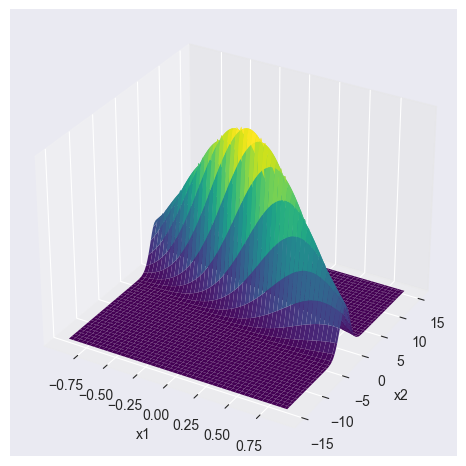

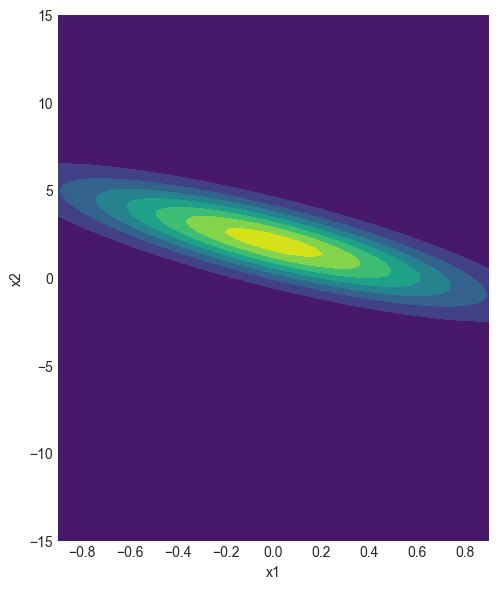

In [350]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6

fig = plt.figure()
means=[0,2]
acov = np.array([[.3,-1], [-1, 5]])
pdf_list = []
distr = multivariate_normal(cov = acov, mean = means, seed = 1000)

mean_1, mean_2 = means[0], means[1]
sigma_1, sigma_2 = acov[0,0], acov[1,1]
     
x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
key = 131
ax = fig.add_subplot(key, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')
plt.xlabel("x1")
plt.ylabel("x2")
#plt.title(f'Covariance between x1 and x2 = {val}')
pdf_list.append(pdf)
ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    #plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


Text(0.5, 1.0, 'No. Of Cyclist that Crossed the Brooklyn Bridge Per Day')

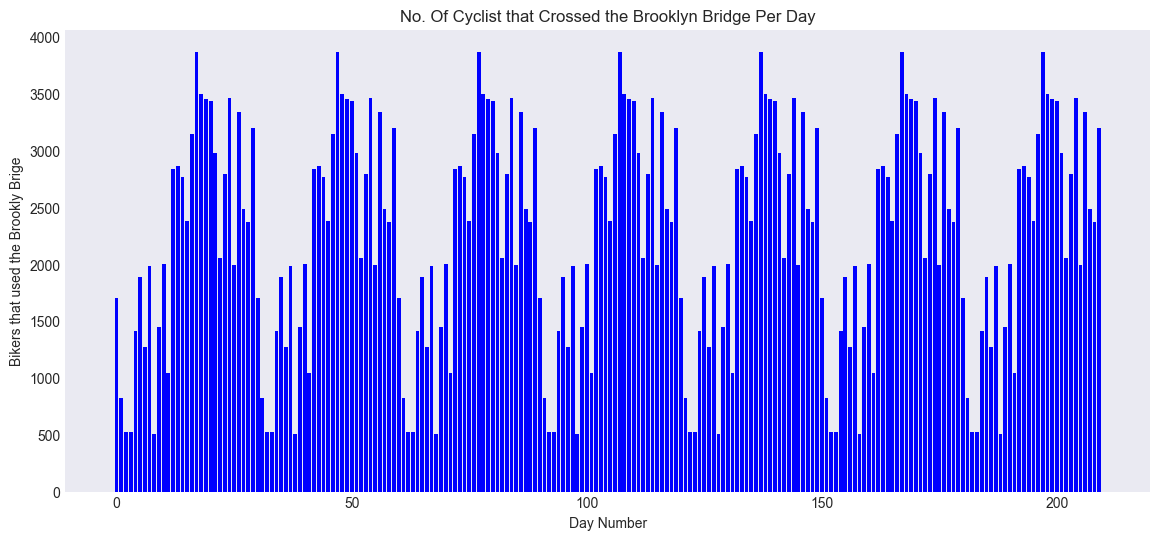

In [101]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.
import seaborn as sns
file=('./nyc-east-river-bicycle-crossings/nyc-east-river-bicycle-counts.csv')
data=pd.read_csv(file)
data.head()
bikers=data.loc[:,"Brooklyn Bridge"]
day=data.iloc[:,0]
plt.bar(day,bikers,color="blue")
plt.xlabel("Day Number")
plt.ylabel("Bikers that used the Brookly Brige")
plt.title("No. Of Cyclist that Crossed the Brooklyn Bridge Per Day")


<BarContainer object of 209 artists>

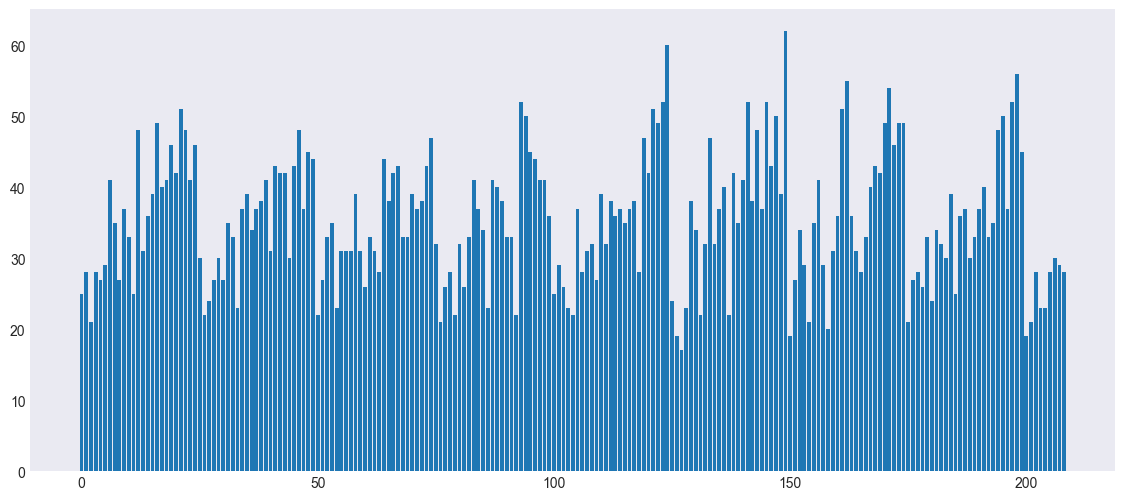

In [353]:
def poisson(lam):
    el,n,u=np.exp(-lam),0,np.random.uniform(0,1)
    pp,fact,pow=el,1,1
    while u>pp:
        n=n+1
        fact,pow=n*fact,lam*pow
        pp=pp+(pow/fact)*el
    return n
y=[]
x=[]
for i in range(209):
    y.append(poisson(i%25+24))
    x.append(i)
    
plt.bar(x,y)


<h1> Explanation for 4b </h1>
Using the code from the video, I generated poission random variables using an incrementing index that was modded by 25 (since that where the original grave would normally peak) and added by 24 to ensure at no point lambda was no less than 24. this yeilded results a little off from the orginal graph since the peaks and valleys were not as high/low.

# Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process. 


Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda=[1, 3, 4]$ and the service time of the requests as an exponential random variable with rate $\mu=4$. 

   

<BarContainer object of 1001 artists>

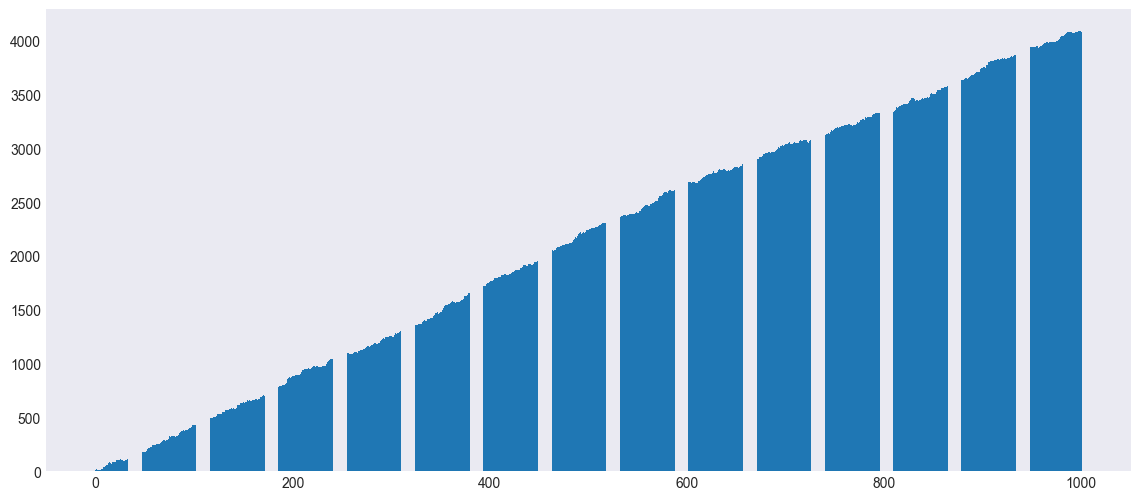

In [336]:
from linkedqueue import Queue
def mm1(lam:int):
    queue=Queue()
    waittime=[]
    breaker=0
    nextArrival = poisson(lam)
    # Compute time of next completed service.
    nextService = nextArrival + np.random.exponential(4) 
    while breaker<=1000:
        # Next event is an arrival.
        while nextArrival < nextService:
            # Simulate an arrival
            queue.enqueue(nextArrival)
            nextArrival += np.random.exponential(4)
    # Next event is a service completion.
        arrival = queue.dequeue()
        wait = nextService - arrival
    # Update the queue.
        if len(queue):
            nextService = nextArrival + np.random.exponential(4)
        else:
            nextService = nextService + np.random.exponential(4)
        waittime.append(wait)
        breaker+=1
    return waittime

waittime_1=mm1(1)
#waittime_3=mm1(3)
#waittime_4=mm1(4)
x=[]
for i in range(len(waittime_1)):
    x.append(i)
plt.bar(x,waittime_1)


<BarContainer object of 1001 artists>

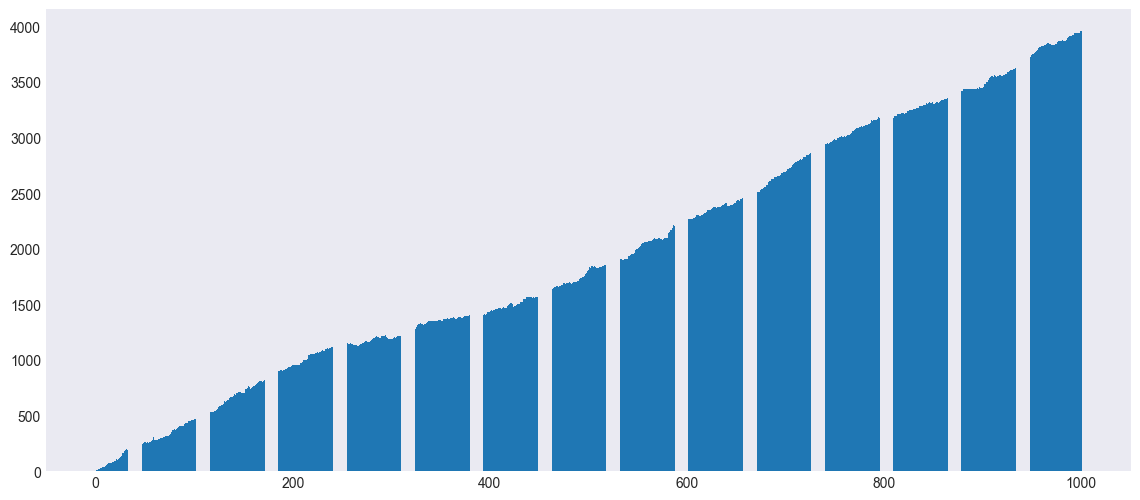

In [338]:
waittime_3=mm1(3)
plt.bar(x,waittime_3)

<BarContainer object of 1001 artists>

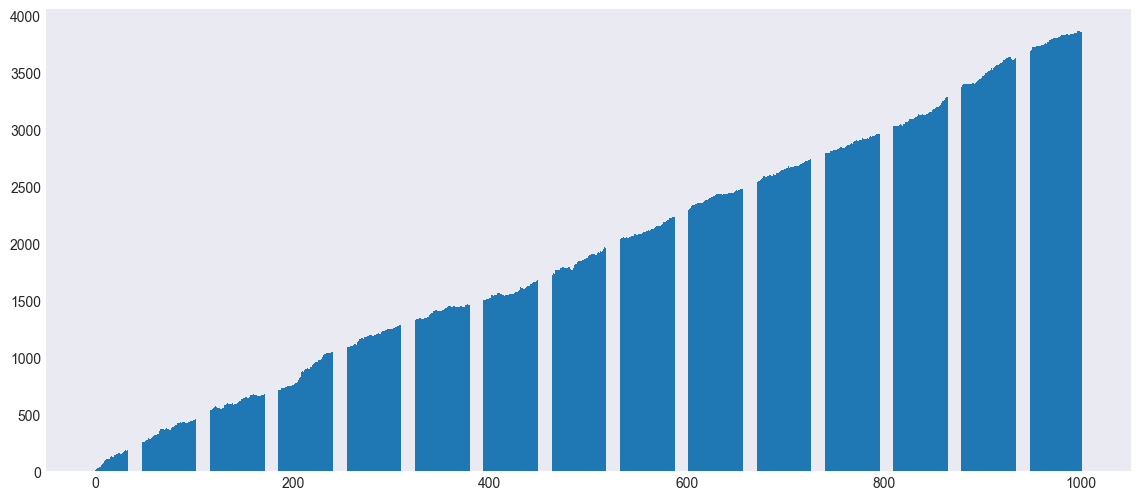

In [340]:
waittime_4=mm1(4)
plt.bar(x,waittime_4)